In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('datos.csv')
data = data.fillna(0)

# Ejercicio 1

In [4]:
min_data = data.min(axis='rows')
min_horas_dedicadas = min_data['horas_dedicadas']
min_calificaciones = min_data['calificaciones_obtenida']

max_data = data.max(axis='rows')
max_horas_dedicadas = max_data['horas_dedicadas']
max_calificaciones = max_data['calificaciones_obtenida']

mean_data = data[['horas_dedicadas', 'calificaciones_obtenida']].mean(axis='rows')
mean_horas_dedicadas = mean_data['horas_dedicadas']
mean_calificaciones = mean_data['calificaciones_obtenida']

std_data = data[['horas_dedicadas', 'calificaciones_obtenida']].std(axis='rows')
std_horas_dedicadas = std_data['horas_dedicadas']
std_calificaciones = std_data['calificaciones_obtenida']

In [5]:
df = pd.DataFrame({
    'min': [min_horas_dedicadas, min_calificaciones],
    'max': [max_horas_dedicadas, max_calificaciones],
    'mean': [mean_horas_dedicadas, mean_calificaciones],
    'std': [std_horas_dedicadas, std_calificaciones]
}, index=['horas_dedicadas', 'califcaciones_obtenida'])

                        min    max   mean        std
horas_dedicadas         2.0  178.0  99.40  58.129076
califcaciones_obtenida  0.0  100.0  57.65  37.352200


Imprimimos el df con los valores solicitados.

In [25]:
print(df)

                        min    max   mean        std
horas_dedicadas         2.0  178.0  99.40  58.129076
califcaciones_obtenida  0.0  100.0  57.65  37.352200


# Ejercicio 2

In [6]:
horas_dedicadas = np.array(data['horas_dedicadas']).reshape(-1, 1)
calificaciones = np.array(data['calificaciones_obtenida'])

In [7]:
horas_dedicadas

array([[ 52],
       [  2],
       [170],
       [ 42],
       [125],
       [ 47],
       [149],
       [162],
       [139],
       [ 18],
       [ 30],
       [152],
       [ 51],
       [164],
       [ 93],
       [162],
       [ 55],
       [178],
       [ 97],
       [100]])

In [8]:
model = LinearRegression()
model.fit(horas_dedicadas, calificaciones)

LinearRegression()

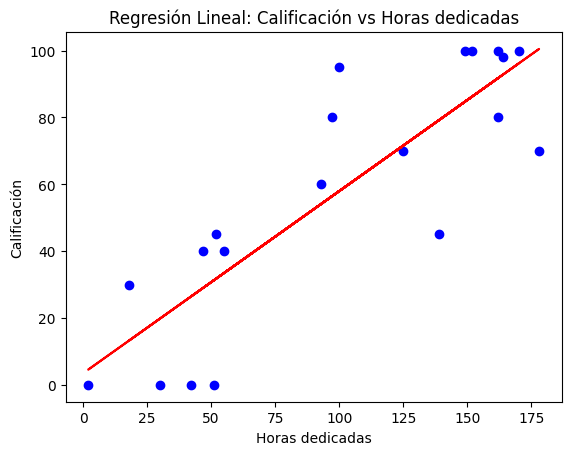

In [22]:
plt.scatter(horas_dedicadas, calificaciones, color='blue')
plt.plot(horas_dedicadas, model.predict(horas_dedicadas), color='red')
plt.title('Regresión Lineal: Calificación vs Horas dedicadas')
plt.xlabel('Horas dedicadas')
plt.ylabel('Calificación')
plt.show()

# Ejercicio 3

In [23]:
def predict_grade(model: LinearRegression, student_id: str):
    numbers = [ int(number) for number in student_id ]
    dedicated_hours = sum(numbers) % 50
    prediction = model.predict([[dedicated_hours]])
    return prediction[0]

Realizamos una predicción

In [24]:
predict_grade(model, '420003117')

18


13.287806382474987

# Ejercicio 4

Una de las pruebas es Ji-cuadrada, que se basa en el estadístico de prueba:
$$X^2=\sum_{i=1}^{n}\frac{(O_i-E_i)^2}{E_i}$$
donde:
- $X^2$ es el estadístico de prueba acumulativo de Pearson, que se aproxima asintóticamente a una distribución $X^2$.
- $O_i$ el número de observaciones, en nuestro caso el valor que obtuvimos del modelo.
- $E_i$ el valor esperado.

Si los valores observados y los correspondientes valores esperados no se aproximan entre sí, el estadístico de prueba puede ser muy grande y se situará en la cola derecha de la curva de Ji-cuadrado.

Fuentes:
- https://openstax.org/books/introducci%C3%B3n-estad%C3%ADstica/pages/11-2-prueba-de-bondad-de-ajuste
- https://es.wikipedia.org/wiki/Distribuci%C3%B3n_%CF%87%C2%B2
- http://www.dcb.unam.mx/profesores/irene/Notas/PruebaBondad.pdf
  